In [2]:
import sys
sys.path.append('../')
sys.path.append('../../')

from errorpro.interactive import *
init(locals())


In [2]:
from scipy.optimize import curve_fit
from numpy import float_
def func(x, m, b):
    return m*x+b
xdata = (float_([[1,2,3],[1,2,3]])).flatten()
ydata = (float_([[2,3,4.1],[2,3,4.1]])).flatten()
params_opt, params_covar = curve_fit(func, xdata, ydata)
print(params_opt)
print(np.sqrt(np.diag(params_covar)))

[ 1.05        0.93333333]
[ 0.01443376  0.03118048]


In [3]:
%%eq
z = 2 <0.1> [m]


In [11]:
from sympy.utilities import lambdify
lambdify((z**2).free_symbols, (z**2), modules="numpy")

TypeError: <lambda>() takes 0 positional arguments but 1 was given

In [5]:
%%eq
a = z**2

TypeError: <lambda>() takes 0 positional arguments but 1 was given

In [4]:
z = assign(2,0.1,name="z")
a = assign(sin(z**2),name="a")
a

$a \; \mathrm{\left[1\right]}$
$-0.76 \pm 0.27$


In [1]:
import sys
sys.path.append('../')
sys.path.append('../../')

from errorpro.interactive import *
init(locals())


[[x, y], m, n] m*x + n*y
lambda x, p0, p1: f(x[0], x[1], p0, p1)
[[ 1.  1.  1.  2.  2.  2.  3.  3.  3.]
 [ 1.  2.  3.  1.  2.  3.  1.  2.  3.]]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9.]


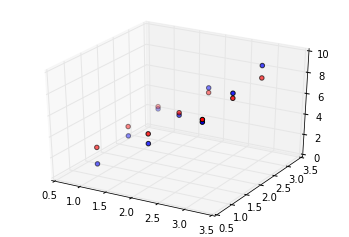

In [5]:
x = assign([1,2,3],name='x')
y = assign([1,2,3],name='y')
z = assign([[1,2,3],[4,5,6],[7,8,9]], name='z')
m, n, b = params('m n b')
fit(m*x+n*y, (x,y), z, [m,n])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xd=np.float_([1,1,1,2,2,2,3,3,3])
yd=np.float_([1,2,3,1,2,3,1,2,3])
ax.scatter(xd,yd,[1,2,3,4,5,6,7,8,9])
ax.scatter(xd,yd,m.value*xd+n.value*yd,c="r")

In [2]:
%%eq
{
t [s], E [J]
    1 6.3
    2 7.4
    3 7.9
    4 8.7
    5 9.5
    6 10.3
}
A = 1 [J]
t0 = 4 [s]

<function <lambda> at 0x085F9618> [ 1.  2.  3.  4.  5.  6.] [  6.3   7.4   7.9   8.7   9.5  10.3] None [5.9717717349376302, 10.837378935839991] False


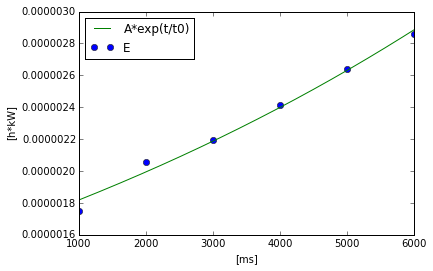

In [6]:
from errorpro.dimensions.dimensions import Dimension
#from errorpro.dimensions.solvers import dim_solve
#from sympy import symbols, exp
#x, y, z = symbols('x y z')
#dim_solve(x*exp(y/z), Dimension(length=1), {'y':Dimension(time=1)})

fit(A*exp(t/t0), t, E, [A,t0])

plot([t,E], [t, A*exp(t/t0)], xunit="ms",yunit="kW*h")



In [7]:
a = [1,3,4,5,6,7]
b = [2.1,0,-0.1,-0.2,-0.3,-0.5]
c = [3,-3,5,6,7,8]
short = assign([3,4,5])
E = assign([a,b,c],[0.2,3,4,1,0.5,2],name="E")
F = assign([a,b,c],name="F")
#np.float_([[2,3,4,5,6],[34,4,5,6,7,4]])
t.value

array([ 1.,  2.,  3.,  4.,  5.,  6.])

[[t, NoName_1], m, n, b] NoName_1*n + b + m*t
lambda x, p0, p1, p2: f(x[0], x[1], p0, p1, p2)
[[ 1.  1.  1.  2.  2.  2.  3.  3.  3.  4.  4.  4.  5.  5.  5.  6.  6.  6.]
 [ 3.  4.  5.  3.  4.  5.  3.  4.  5.  3.  4.  5.  3.  4.  5.  3.  4.  5.]]
[ 1.   3.   4.   5.   6.   7.   2.1  0.  -0.1 -0.2 -0.3 -0.5  3.  -3.   5.
  6.   7.   8. ]


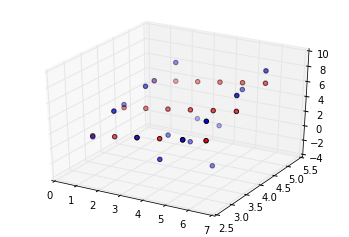

In [10]:

m,n,b = params("m n b")
fit(m*t + n*short + b, (t,short), E, [m,n,b])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
from errorpro.fitting import cartesian
o = cartesian([t.value, short.value])
ax.scatter(o[0],o[1],E.value.flatten())
ax.scatter(o[0],o[1],m.value*o[0]+n.value*o[1]+b.value,c="r")